In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.ticker as ticker
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [43]:
dataset= pd.read_csv('data.csv', index_col = 0)
dataset.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino


In [14]:
dataset['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

In [15]:
dataset.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [17]:
dataset.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

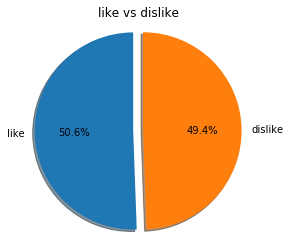

In [18]:
labels = 'like', 'dislike'
sizes = [dataset.target[dataset['target']==1].count(), dataset.target[dataset['target']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("like vs dislike")
plt.show()

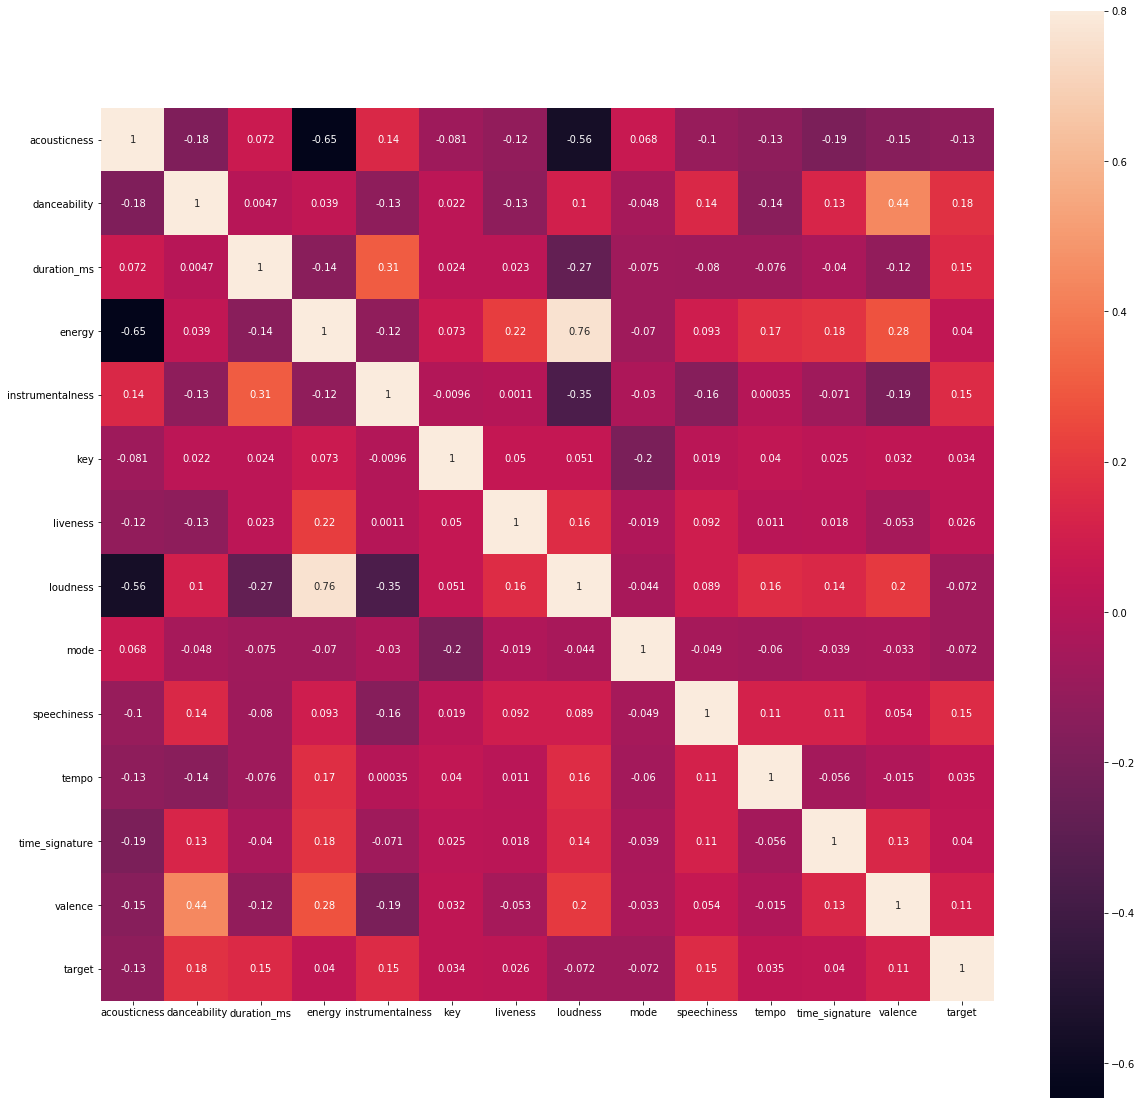

In [19]:
import seaborn as sb

correlationmat = dataset.corr(method='pearson')
f, ax = plt.subplots(figsize = (20,20))
sb.heatmap(correlationmat, vmax=0.8, square=True, annot=True);

In [22]:
y = dataset.target.values
x_data = dataset.drop(['target','song_title','artist','mode'], axis = 1)  
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
X_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [24]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"
        ]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [44]:
from sklearn.model_selection import cross_val_score

# iterate over classifiers
results = {}
for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test)
    print(metrics.confusion_matrix(y_test, y_pred))
    results[name] = clf.score(x_test,y_test)

[[147  53]
 [ 92 112]]
[[149  51]
 [ 95 109]]
[[162  38]
 [ 83 121]]
[[153  47]
 [ 77 127]]
[[144  56]
 [ 72 132]]
[[152  48]
 [ 54 150]]


C:\Users\khameesiyadjamoos\Anaconda3\envs\cadenza\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[155  45]
 [ 68 136]]
[[141  59]
 [ 59 145]]
[[110  90]
 [ 73 131]]
[[155  45]
 [ 88 116]]


In [38]:
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% " % (name, 100*scores.mean()))

   Nearest Neighbors | Accuracy: 64.11% 
          Linear SVM | Accuracy: 63.86% 
             RBF SVM | Accuracy: 70.05% 
    Gaussian Process | Accuracy: 69.31% 
       Decision Tree | Accuracy: 67.33% 
       Random Forest | Accuracy: 75.50% 
          Neural Net | Accuracy: 71.04% 
            AdaBoost | Accuracy: 70.79% 
         Naive Bayes | Accuracy: 59.65% 
                 QDA | Accuracy: 67.08% 
